In [150]:
import pandas as pd

df = pd.read_csv('operations.csv', parse_dates=['date_operation'], dtype={'categ': 'category'})

df.head()

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE


In [151]:
courses = df.loc[df['categ']=='COURSES'].copy()
courses.drop_duplicates(subset=['date_operation', 'libelle', 'montant', 'solde_avt_ope'], inplace=True)

In [152]:
courses.head()

,date_operation,libelle,montant,solde_avt_ope,categ
9,2023-04-05,CARTE XX XX LES ANCIENS ROBINSON XX,-6.80,2049.00,COURSES
19,2023-04-10,CARTE XX XX LES ANCIENS ROBINSON XX,-42.42,2885.70,COURSES
43,2023-04-25,CARTE XX XX LES ANCIENS ROBINSON XX,-32.67,3647.67,COURSES
46,2023-04-26,CARTE XX XX LA LOUVE XX XX,-1.90,3605.00,COURSES
47,2023-04-28,CARTE XX XX LES ANCIENS ROBINSON XX,-9.11,3603.10,COURSES


In [153]:
courses['attente'] = 0

In [154]:
import numpy as np
courses['tempo_index'] = np.arange(len(courses))

In [155]:
courses.head()

,date_operation,libelle,montant,solde_avt_ope,categ,attente,tempo_index
9,2023-04-05,CARTE XX XX LES ANCIENS ROBINSON XX,-6.80,2049.00,COURSES,0,0
19,2023-04-10,CARTE XX XX LES ANCIENS ROBINSON XX,-42.42,2885.70,COURSES,0,1
43,2023-04-25,CARTE XX XX LES ANCIENS ROBINSON XX,-32.67,3647.67,COURSES,0,2
46,2023-04-26,CARTE XX XX LA LOUVE XX XX,-1.90,3605.00,COURSES,0,3
47,2023-04-28,CARTE XX XX LES ANCIENS ROBINSON XX,-9.11,3603.10,COURSES,0,4


In [156]:
courses['date_previous'] = courses.shift(1)['date_operation']

In [157]:
courses['attente'] = courses['date_operation'] - courses['date_previous']

In [158]:
courses.dtypes

date_operation     datetime64[ns]
libelle                    object
montant                   float64
solde_avt_ope             float64
categ                    category
attente           timedelta64[ns]
tempo_index                 int32
date_previous      datetime64[ns]
dtype: object

In [159]:
courses.head()

,date_operation,libelle,montant,solde_avt_ope,categ,attente,tempo_index,date_previous
9,2023-04-05,CARTE XX XX LES ANCIENS ROBINSON XX,-6.80,2049.00,COURSES,NaT,0,NaT
19,2023-04-10,CARTE XX XX LES ANCIENS ROBINSON XX,-42.42,2885.70,COURSES,5 days,1,2023-04-05
43,2023-04-25,CARTE XX XX LES ANCIENS ROBINSON XX,-32.67,3647.67,COURSES,15 days,2,2023-04-10
46,2023-04-26,CARTE XX XX LA LOUVE XX XX,-1.90,3605.00,COURSES,1 days,3,2023-04-25
47,2023-04-28,CARTE XX XX LES ANCIENS ROBINSON XX,-9.11,3603.10,COURSES,2 days,4,2023-04-26


In [160]:
montants = -courses.groupby('date_operation')['montant'].sum()

In [161]:
attentes = courses.groupby('date_operation')['attente'].first()

In [162]:
montants

date_operation
2023-04-05     6.80
2023-04-10    42.42
2023-04-25    32.67
2023-04-26     1.90
2023-04-28     9.11
2023-05-02    12.24
2023-05-04    17.16
2023-05-05     3.48
2023-05-10    42.45
2023-05-15    46.51
2023-05-23     4.41
2023-05-29    22.59
2023-05-31     6.89
2023-06-12    13.02
2023-06-16     4.39
2023-06-19    27.76
2023-06-26    34.28
2023-06-28    12.49
2023-07-13     9.88
2023-07-25    60.16
2023-07-31    24.37
2023-08-07    21.73
2023-08-17    28.11
2023-08-22    10.91
2023-08-28    29.18
2023-08-31    26.19
2023-09-04    13.59
2023-09-11     9.60
2023-09-18    20.59
2023-09-20     2.56
2023-09-26    13.29
Name: montant, dtype: float64

In [163]:
attentes

date_operation
2023-04-05       NaT
2023-04-10    5 days
2023-04-25   15 days
2023-04-26    1 days
2023-04-28    2 days
2023-05-02    4 days
2023-05-04    2 days
2023-05-05    1 days
2023-05-10    5 days
2023-05-15    5 days
2023-05-23    8 days
2023-05-29    6 days
2023-05-31    2 days
2023-06-12   12 days
2023-06-16    4 days
2023-06-19    3 days
2023-06-26    7 days
2023-06-28    2 days
2023-07-13   15 days
2023-07-25   12 days
2023-07-31    6 days
2023-08-07    7 days
2023-08-17   10 days
2023-08-22    5 days
2023-08-28    6 days
2023-08-31    3 days
2023-09-04    4 days
2023-09-11    7 days
2023-09-18    7 days
2023-09-20    2 days
2023-09-26    6 days
Name: attente, dtype: timedelta64[ns]

In [167]:
courses_2 = pd.DataFrame({'montant': montants.values, 'attente': attentes.values})

In [170]:
courses_2.sort_index(inplace=True)
courses_2.dropna(inplace=True)

In [171]:
courses_2.head()

,montant,attente
1,42.42,5 days
2,32.67,15 days
3,1.90,1 days
4,9.11,2 days
5,12.24,4 days


In [173]:
courses_2.dtypes

montant            float64
attente    timedelta64[ns]
dtype: object

attente       1.344952
intercept    12.330276
dtype: float64


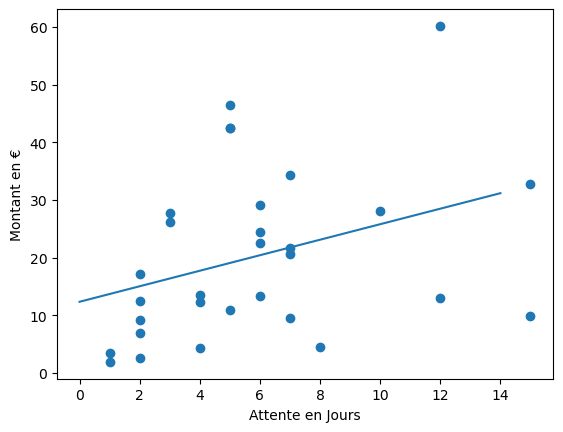

In [174]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

Y = courses_2['montant']
courses_2['attente'] = courses_2['attente'] / np.timedelta64(1, "D")
X = courses_2[['attente']] 
X = X.copy()
X['intercept']=1.
result = sm.OLS(Y,X).fit()
print(result.params)
a,b = result.params['attente'], result.params['intercept']

plt.figure()
plt.scatter(courses_2['attente'], courses_2['montant'])
plt.plot(np.arange(15), [a*x+b for x in np.arange(15)])
plt.xlabel('Attente en Jours')
plt.ylabel('Montant en €')
plt.show()